### Import Dependency

In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_validate

### Data Import

In [2]:
df=pd.read_csv('sps3.csv')
print(df)
df.columns

    Temperature    RD  Grain_size  Hardness     FT    FTT
0          1175  93.7       0.800    15.310  5.192  51.92
1          1200  95.2       0.900    18.500  3.700  37.00
2          1225  98.2       1.000    20.600  4.500  45.00
3          1250  99.3       1.600    21.000  3.600  36.00
4          1300  99.8       4.400    19.200  3.200  32.00
..          ...   ...         ...       ...    ...    ...
81         1700  99.0       3.268    12.309  2.800  28.00
82         1700  97.5       3.268    12.191  3.400  34.00
83         1700  95.5       3.268    11.329  4.000  40.00
84         1700  98.0       3.268    12.230  5.192  51.92
85         1700  96.9       3.268    11.799  5.192  51.92

[86 rows x 6 columns]


Index(['Temperature', 'RD', 'Grain_size', 'Hardness', 'FT', 'FTT'], dtype='object')

In [4]:
X=df.drop(['Hardness', 'FT','FTT'],axis=1).values
y=df['Hardness'].values

### Scaling and Splitting

In [5]:
scaler = StandardScaler()
scaler.fit(X)  
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

## Model training

In [125]:
#random State=0
from sklearn.inspection import permutation_importance
from sklearn import datasets, ensemble
params = {'n_estimators': 18,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.55,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
#y_pred=reg.predict(X_test)

GradientBoostingRegressor(learning_rate=0.55, max_depth=4, min_samples_split=5,
                          n_estimators=18)

In [6]:
#random State=30
from sklearn.inspection import permutation_importance
from sklearn import datasets, ensemble
params = {'n_estimators': 100,
          'max_depth': 100,
          'min_samples_split': 3,
          'learning_rate': 0.05,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=100,
                          min_samples_split=3)

### Accuracy, MSE & MAE

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=25)

In [7]:
y_pred=reg.predict(X_test)
accuracy=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(accuracy,mse,mae)

0.9480721478719496 0.9838612616997933 0.62715328654607


### Feature Importance

In [8]:
feature_list = list(['Temperature', 'RD', 'Grain_size'])
feature_imp = pd.Series(reg.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Temperature    0.461041
Grain_size     0.343739
RD             0.195220
dtype: float64


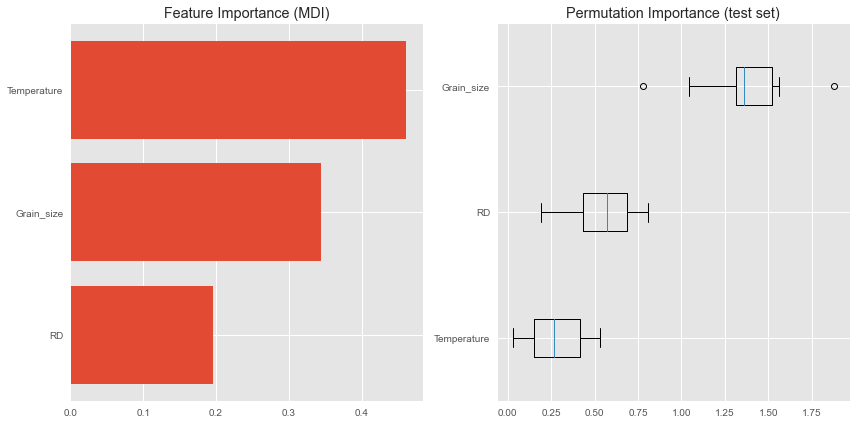

In [25]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_list)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(feature_list)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [28]:

scoring = "neg_mean_absolute_percentage_error"
dropped_result = cross_validate(hist_dropped, X, y, cv=3, scoring=scoring)
one_hot_result = cross_validate(hist_one_hot, X, y, cv=3, scoring=scoring)
ordinal_result = cross_validate(hist_ordinal, X, y, cv=3, scoring=scoring)
native_result = cross_validate(hist_native, X, y, cv=3, scoring=scoring)


def plot_results(figure_title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

    plot_info = [('fit_time', 'Fit times (s)', ax1, None),
                 ('test_score', 'Mean Absolute Percentage Error', ax2,
                  (0, 0.20))]

    x, width = np.arange(4), 0.9
    for key, title, ax, y_limit in plot_info:
        items = [dropped_result[key], one_hot_result[key], ordinal_result[key],
                 native_result[key]]
        ax.bar(x, [np.mean(np.abs(item)) for item in items],
               width, yerr=[np.std(item) for item in items],
               color=['C0', 'C1', 'C2', 'C3'])
        ax.set(xlabel='Model', title=title, xticks=x,
               xticklabels=["Dropped", "One Hot", "Ordinal", "Native"],
               ylim=y_limit)
    fig.suptitle(figure_title)


plot_results("Gradient Boosting on Adult Census")

NameError: name 'hist_dropped' is not defined

### Plots

Text(0.5, 1.0, 'Hardness Practical Vs Predction')

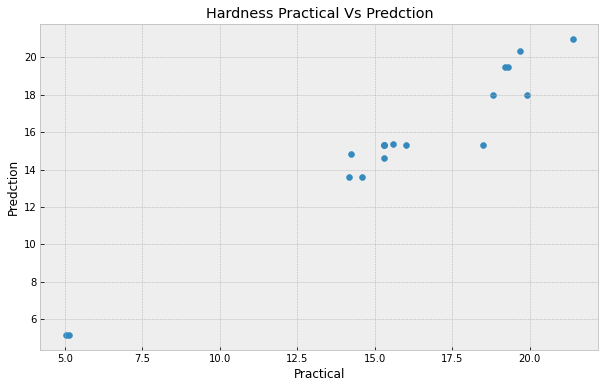

In [9]:
plt.figure(figsize=(10,6))
plt.style.use('bmh')
plt.scatter( y_test, y_pred)
plt.xlabel('Practical')
plt.ylabel('Predction')
plt.title('Hardness Practical Vs Predction')

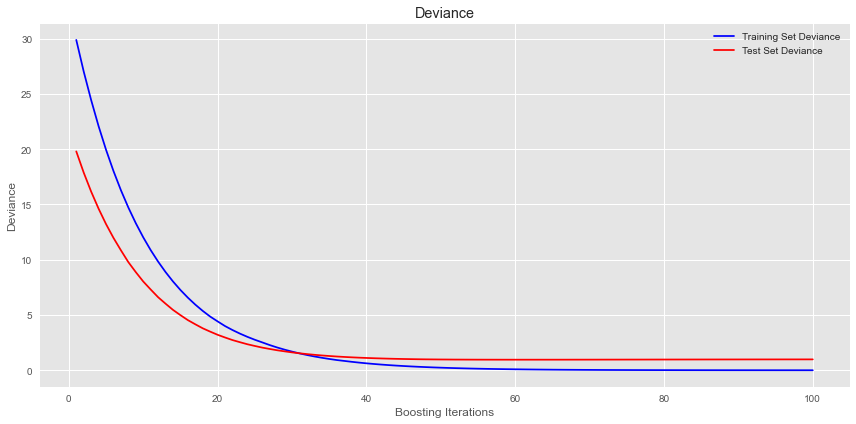

In [14]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [138]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


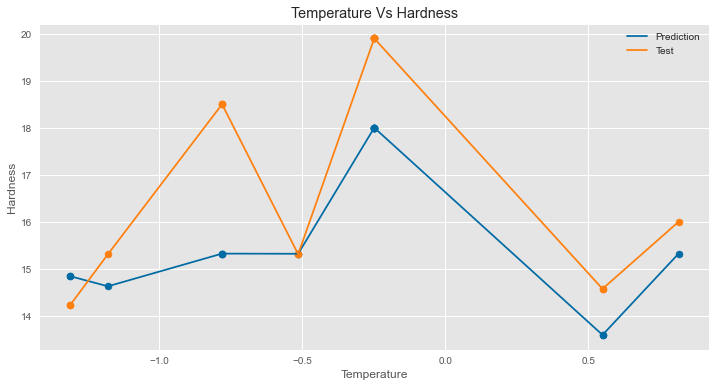

In [19]:
#Temperature Vs Hardness
temp=[row[0] for row in X_test]
dp={}
dt={}
for i in range(len(temp)):
    dp[temp[i]]=y_pred[i]
    dt[temp[i]]=y_test[i]

otemp=sorted(temp)
oy_pred=[]
oy_test=[]
for k in otemp:
    oy_pred.append(dp[k])
    oy_test.append(dt[k])
    
#Plot
plt.figure(figsize=(12,6))
plt.style.use('tableau-colorblind10')
plt.plot(otemp,oy_pred, label='Prediction')
plt.scatter(otemp,oy_pred)
plt.plot(otemp,oy_test, label='Test')
plt.scatter(otemp,oy_test)
plt.legend(loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Hardness')
plt.title('Temperature Vs Hardness')
plt.show()

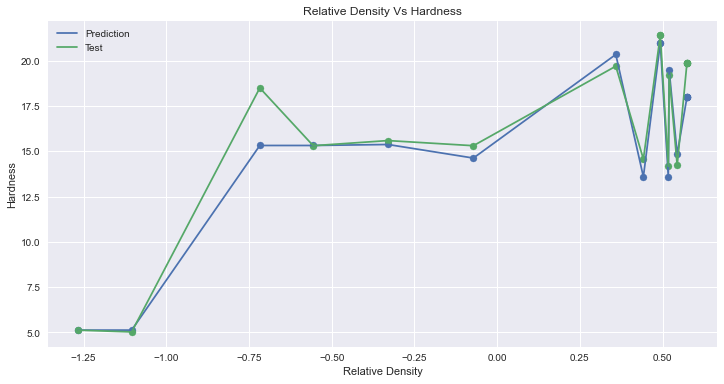

In [20]:
#Relative Density Vs Hardness
temp=[row[1] for row in X_test]
dp={}
dt={}
for i in range(len(temp)):
    dp[temp[i]]=y_pred[i]
    dt[temp[i]]=y_test[i]

otemp=sorted(temp)
oy_pred=[]
oy_test=[]
for k in otemp:
    oy_pred.append(dp[k])
    oy_test.append(dt[k])
    
#Plot
plt.figure(figsize=(12,6))
plt.style.use('seaborn')
plt.plot(otemp,oy_pred, label='Prediction')
plt.scatter(otemp,oy_pred)
plt.plot(otemp,oy_test, label='Test')
plt.scatter(otemp,oy_test)
plt.legend(loc='upper left')
plt.xlabel('Relative Density')
plt.ylabel('Hardness')
plt.title('Relative Density Vs Hardness')
plt.show()

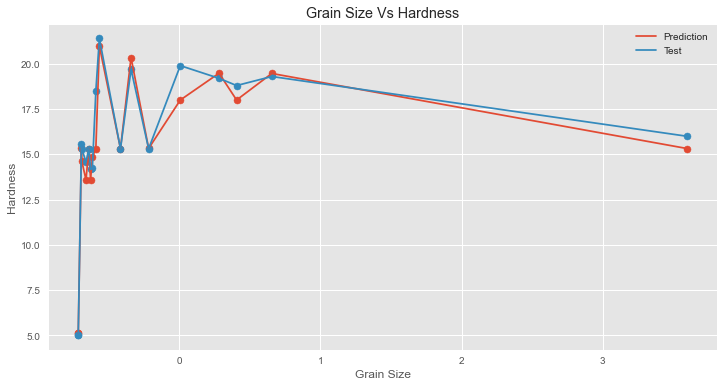

In [21]:
#Grain Size Vs Hardness
temp=[row[2] for row in X_test]
dp={}
dt={}
for i in range(len(temp)):
    dp[temp[i]]=y_pred[i]
    dt[temp[i]]=y_test[i]

otemp=sorted(temp)
oy_pred=[]
oy_test=[]
for k in otemp:
    oy_pred.append(dp[k])
    oy_test.append(dt[k])
    
#Plot
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
plt.plot(otemp,oy_pred, label='Prediction')
plt.scatter(otemp,oy_pred)
plt.plot(otemp,oy_test, label='Test')
plt.scatter(otemp,oy_test)
plt.legend(loc='upper right')
plt.xlabel('Grain Size')
plt.ylabel('Hardness')
plt.title('Grain Size Vs Hardness')
plt.show()